# 3I026 - Intelligence artificielle & Data science

TP 4 : Programmation du kernel perceptron
=======

Dans ce TP, nous allons principalement étendre le perceptron du TP3 à l'aide de noyaux, avant de commencer le projet.

**Indiquer dans la boîte ci-dessous vos noms et prénoms**

ABBACHE Yahiathen, SAOUDAT Ahmed

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import math
%matplotlib inline

In [14]:
def split(dataset,n):
    ratio=float(n/100)
    
    list=[]
    
    for i in range(dataset.size()):
        list.append( (dataset.getX(i),dataset.getY(i)) )
        
    
    
    
    np.random.shuffle(list)
    
    l=int(ratio*dataset.size())
     
      
    a=list[:l]
    b=list[l:]
    
    test_set=LabeledSet(input_dimension=dataset.input_dimension)
    train_set= LabeledSet(input_dimension=dataset.input_dimension)
    
    for i in range( len(a) ):
        test_set.addExample(a[i][0], a[i][1])

    for i in range( len(b)):
        train_set.addExample(b[i][0],b[i][1])
  
    
    return test_set,train_set

In [15]:
class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self, vector, label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x,vector))
            self.y = np.vstack((self.y,label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
        
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
            
    #Renvoie la valeur de y_i
    def getY(self, i):
        return self.y[i]

In [16]:
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    #Permet de calculer la qualité du système 
    def accuracy(self, dataset):
        nb_ok = 0
        for i in range(dataset.size()):
            output = self.predict(dataset.getX(i))
            if (output * dataset.getY(i) > 0):
                nb_ok = nb_ok + 1
        acc = nb_ok / (dataset.size() * 1.0)
        return acc

In [17]:
class ClassifierRandom(Classifier):
    def __init__(self, dim):
        self.w = np.random.rand(dim)

    def predict(self, x):
        z = np.dot(x, self.w)
        if z > 0:
            return +1
        else:
            return -1

In [18]:
def plot2DSet(dataset):
    """ new version that displays the marker according to the value of the point (ie -1 or 1)
    """
    positive_count=0
    negative_count=0
    
    
    
    for i in range(dataset.nb_examples):

        if dataset.y[i] == -1:
            
            if negative_count==0:
                negative=np.array(dataset.x[i])
                negative_count+=1
            else:
                negative = np.vstack((negative, dataset.x[i]))
                
        elif dataset.y[i] == 1:
            if positive_count==0:
                positive=np.array(dataset.x[i])
                positive_count+=1
            else:
                positive = np.vstack((positive, dataset.x[i]))
        
    plt.scatter(positive[:,0],positive[:,1],marker='o')
    plt.scatter(negative[:,0],negative[:,1],marker='x')

In [19]:
def plot_frontiere(set, classifier, step=20):
    
    mmax = set.x.max(0)
    mmin = set.x.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0], mmax[0], step), np.linspace(mmin[1], mmax[1], step))
    grid = np.hstack((x1grid.reshape(x1grid.size, 1), x2grid.reshape(x2grid.size, 1)))
    
    # calcul de la prediction pour chaque point de la grille
    res = np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res = res.reshape(x1grid.shape)
    # tracé des frontieres
    plt.contourf(x1grid, x2grid, res, colors=["red", "cyan"], levels=[-1000,0,1000], linewidth=2)
 

In [73]:
center_a=[3,3]
sigma_a=[[1,0],[0,1]]

center_b=[-2,-2]
sigma_b=[[1,0],[0,1]]

nb_points=200


gaus_test1 = np.random.multivariate_normal(center_a,sigma_a,nb_points)
gaus_train1 = np.random.multivariate_normal(center_a,sigma_a,nb_points)

gaus_test2 = np.random.multivariate_normal(center_b,sigma_b,nb_points)
gaus_train2 = np.random.multivariate_normal(center_b,sigma_b,nb_points)

test_set = LabeledSet(2)

train_set = LabeledSet(2);

for tmp in gaus_test1:
    test_set.addExample(tmp,1)
for tmp in gaus_test2:
    test_set.addExample(tmp,-1)


for tmp in gaus_train1:
    train_set.addExample(tmp,1)
for tmp in gaus_train2:
    train_set.addExample(tmp,-1)
    
#ON A TRAIN_SET
#ON A TEST_SET

#the_set=train_set


In [27]:
#la data des 2 gaussienes
center_a=[0,0]
sigma_a=[[0.01,0],[0,0.01]]

center_b=[1,1]
sigma_b=[[0.01,0],[0,0.01]]

nb_points=200
#les positives
gauss_positive_1=np.random.multivariate_normal(center_a,sigma_a,nb_points)
gauss_positive_2=np.random.multivariate_normal(center_b,sigma_b,nb_points)


center_a=[1,0]
sigma_a=[[0.01,0],[0,0.01]]

center_b=[0,1]
sigma_b=[[0.01,0],[0,0.01]]

nb_points=200
#les negatives
gauss_negative_1=np.random.multivariate_normal(center_a,sigma_a,nb_points)
gauss_negative_2=np.random.multivariate_normal(center_b,sigma_b,nb_points)

#poue les tests
#test_set = LabeledSet(2)
#pour l'entrainement
train_set_gauss = LabeledSet(2);


for tmp in gauss_positive_1:
    train_set_gauss.addExample(tmp,1)


for tmp in gauss_positive_2:
    train_set_gauss.addExample(tmp,1)
    
for tmp in gauss_negative_1:
    train_set_gauss.addExample(tmp,-1)
    
for tmp in gauss_negative_2:
    train_set_gauss.addExample(tmp,-1)
#on a un train_set

Kernel Trick
--------------

Nous allons projeter (manuellement) les données 2D dans un espace de plus grande dimension. Voici un exemple de projection qui transforme un vecteur $(x_1,x_2)$ en un vecteur $(x_1,x_2,1)$

In [21]:
class KernelBias:
    def transform(self,x):
        y=np.asarray([x[0],x[1],1])
        return y

k=KernelBias()
k.transform(train_set.getX(1))


array([ 2.18572167,  3.5714623 ,  1.        ])

Implémentez la classe perceptron qui prend un Kernel en paramètre, et calcule le perceptron sur la version "kernélisée" des données. Tester ce perceptron sur le dataset 1 (2 gaussiennes) et le dataset XOR

/home/yahiathen/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


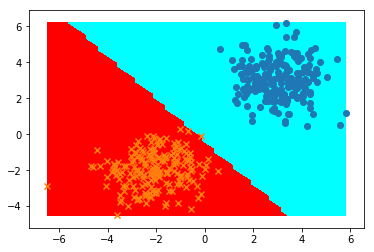

In [59]:
class PerceptronKernel(Classifier):
    
    def __init__(self, input_dimension, learning_rate, nombre_iterations):
            self.input_dimension=input_dimension
            self.learning_rate=learning_rate#epsilon
            self.nombre_iterations=nombre_iterations
            self.w= np.random.rand(self.input_dimension)-[0.5]*self.input_dimension
    #Permet de calculer la prediction sur x => renvoie un score
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        ker=KernelBias()
        newX=ker.transform(x)
        # predire le label d'un à travers le W
        return np.sign(np.dot(newX,self.w))
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        
        res=[]
        
        self.labeledSet=labeledSet
        #self.w= np.random.rand(self.input_dimension)-[0.5]*self.input_dimension
       
        data_validation, data_apprentissage= split(labeledSet,20)
        
        
        #ALLER JUSQU'À NOBRE ITERATION
        for i in range(self.nombre_iterations):
            #POUR TOUS LES POINTS DU DATA APPRENTISSAGE
            for j in range(data_apprentissage.size()):
                
                #la projection des données
                ker=KernelBias()
                newX=ker.transform(data_apprentissage.getX(j))
                
                
                #Si le point est mal placé 
                scalar_prod=np.dot(newX,self.w)
                
                if (data_apprentissage.getY(j)[0] * scalar_prod <= 0):
                    #x=data_apprentissage.getX(j)
                    x=newX
                    y=data_apprentissage.getY(j)[0]
                    
                    
                    
                    for k in range(self.input_dimension):
                        self.w[k]+= self.learning_rate  * x[k] * y
                    #self.w = self.w + self.learning_rate*labeledSet.getX(j)*labeledSet.getY(j)
            if (i % 10==0):
                #print(self.accuracy(data_validation))
                #retourner la liste de des (nbrIter, et l'accuracy)
                res.append((i,self.accuracy(data_validation)))
        return res
    
                

### TODO: Tester le perceptron sur les deux datasets

learning_rate=0.01
nombre_iterations=100
input_dimension=2+1
perc=PerceptronKernel(input_dimension,learning_rate,nombre_iterations)
perc.train(train_set)


# évaluation avec les données d'apprentissage 
plot_frontiere(test_set,perc,50)

plot2DSet(test_set)



### Test sur le gaussiennes

/home/yahiathen/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


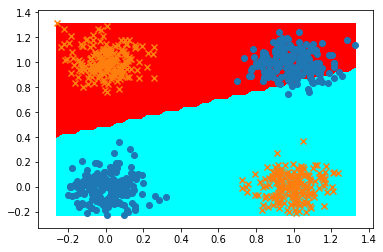

In [61]:
learning_rate=0.01
nombre_iterations=500
input_dimension=2+1
perc=PerceptronKernel(input_dimension,learning_rate,nombre_iterations)
perc.train(train_set_gauss)


# évaluation avec les données d'apprentissage 
plot_frontiere(train_set_gauss,perc,50)

plot2DSet(train_set_gauss)


Implémenter le kernel : $(x_1,x_2) \rightarrow (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. Entrainez le perceptron correspondant sur le XOR. Que constatez vous ? Donnez une explication.

In [63]:
#prof
class KernelPolynomial:
    def transform(self,x):        
        to_add=[1,x[0]*x[1],x[0]**2,x[1]**2]
        return np.concatenate((x, to_add), axis=0)

    
class Perceptron_polynomial(Classifier):
    
    def __init__(self, input_dimension, learning_rate, nombre_iterations):
        self.input_dimension=input_dimension
        self.learning_rate=learning_rate#epsilon
        self.nombre_iterations=nombre_iterations
        self.w= np.random.rand(self.input_dimension)-[0.5]*self.input_dimension
    #Permet de calculer la prediction sur x => renvoie un score
    
    #Permet de calculer la prediction sur x => renvoie un score
    def predict(self, x):
        ker=KernelPolynomial()
        newX=ker.transform(x)
        # predire le label d'un à travers le W
        return np.sign(np.dot(newX,self.w))
    
    #Permet d'entrainer le modele sur un ensemble de données
    def train(self, labeledSet):
        
        res=[]
        
        self.labeledSet=labeledSet
        #self.w= np.random.rand(self.input_dimension)-[0.5]*self.input_dimension
       
        data_validation, data_apprentissage= split(labeledSet,20)
        
        
        
        #ALLER JUSQU'À NOMBRE ITERATION
        for i in range(self.nombre_iterations):
            #POUR TOUS LES POINTS DU DATA APPRENTISSAGE
            for j in range(data_apprentissage.size()):
                
                #la projection des données
                ker=KernelPolynomial()
                newX=ker.transform(data_apprentissage.getX(j))
                
                
                #Si le point est mal placé 
                scalar_prod=np.dot(newX,self.w)
                
                if (data_apprentissage.getY(j)[0] * scalar_prod <= 0):
                    #x=data_apprentissage.getX(j)
                    x=newX
                    y=data_apprentissage.getY(j)[0]
                    
                    
                    
                    for k in range(self.input_dimension):
                        self.w[k]+= self.learning_rate  * x[k] * y
                    #self.w = self.w + self.learning_rate*labeledSet.getX(j)*labeledSet.getY(j)
            if (i % 10==0):
                #retourner la liste de des (nbrIter, et l'accuracy)
                res.append((i,self.accuracy(data_validation)))
        return res
    

/home/yahiathen/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


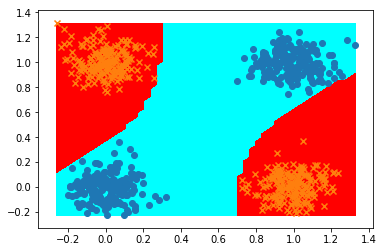

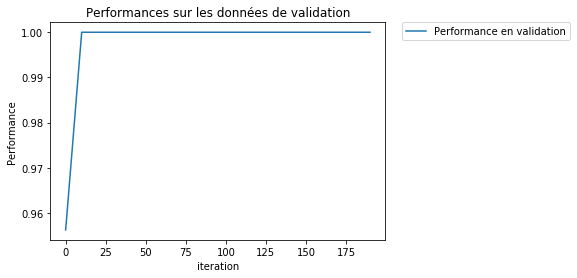

In [64]:
##TESTER SUR XOR ET DESSINER LA FRONTIèRE DE DECISION

learning_rate=0.01
nombre_iterations=200
input_dimension=2+4
perc=Perceptron_polynomial(input_dimension,learning_rate,nombre_iterations)

accu=perc.train(train_set_gauss)
#print(perc.accuracy(test_set))

# évaluation avec les données d'apprentissage 
plot_frontiere(train_set_gauss,perc,50)

plot2DSet(train_set_gauss)

plt.figure()  
x=[i for (i,j) in accu]
y=[j for (i,j) in accu]

   
plt.plot(x, y, label = "Performance en validation")
plt.xlabel("iteration")
plt.ylabel("Performance")
plt.title("Performances sur les données de validation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#N=100
#k=KernelPoly()
#perceptron_k=PerceptronKernel(6,0.001,k)




## Réponse:
Nous constatons que le Kernel Polynomial a bien réussit à classer les données de XOR apres avoir projeté les données dans une dimension plus grande(3 dimensions minimum) que celle des données, qu'on a échoué à realiser avec un kernelBias, et Perceptron, du fait qu'on essayait de separer avec une frontiere de dimension inferieure inferieure à celle des données, en projetant dans une D+4, on pu avoir une frontiere polynomiale

Mise en oeuvre sur des données réelles 
-------
Tester la version à noyau du perceptron sur les données réelles

In [55]:
from sklearn.datasets import fetch_mldata

def loadFile(name):
    data = fetch_mldata(name, data_home='.')
    print(data.data.shape)
    unique=np.unique(data.target)
    for i in range(len(data.target)):
        if (data.target[i]==unique[0]):
            data.target[i]=1
        else:
            data.target[i]=-1
    return data       
data=loadFile('breast-cancer_scale')
#Les donnees sont dans data.data et data.target

dataSet=LabeledSet(len(data.data[0]))

x_set=[]
y_set=[]

for tmp in data.data:
    x_set.append(tmp)
for tmp in data.target:
    y_set.append(tmp)
for i in range(len(x_set)):
    dataSet.addExample(x_set[i],y_set[i])
    
#On a les donneé labledSet dans dataSet


(683, 10)


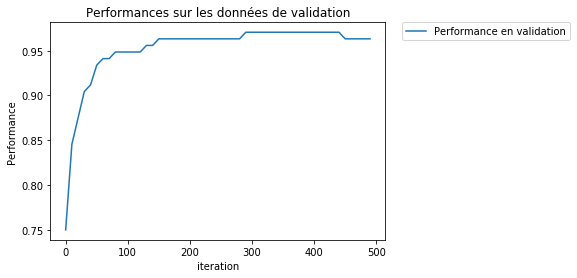

In [74]:
##TESTER SUR XOR ET DESSINER LA FRONTIèRE DE DECISION

learning_rate=0.0001
nombre_iterations=500
input_dimension=10+4
perc=Perceptron_polynomial(input_dimension,learning_rate,nombre_iterations)

accu=perc.train(dataSet)
#print(perc.accuracy(test_set))
"""
# évaluation avec les données d'apprentissage 
plot_frontiere(dataSet,perc,50)

plot2DSet(dataSet)

plt.figure()  
"""
x=[i for (i,j) in accu]
y=[j for (i,j) in accu]

   
plt.plot(x, y, label = "Performance en validation")
plt.xlabel("iteration")
plt.ylabel("Performance")
plt.title("Performances sur les données de validation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
